# Cleansing and Preparations

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df910 = pd.read_excel('D:\Side Project Pintap\Trx910.xlsx')
df1011 =pd.read_excel('D:\Side Project Pintap\Trx1011.xlsx')

In [5]:
trx_full = pd.concat([df910,df1011])

In [6]:
trx_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1067371 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 73.3+ MB


In [6]:
trx_full['InvoiceDate'] = pd.to_datetime(trx_full['InvoiceDate'])

In [7]:
trx_full.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

In [7]:
trx_full.drop(trx_full[trx_full['Customer ID'].isnull()].index.tolist(),axis = 0, inplace = True)
trx_full.reset_index(inplace = True, drop = True)

In [8]:
trx_full.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [9]:
trx_full

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
644103,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
644104,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
644105,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
644106,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [10]:
trx_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 644108 entries, 0 to 644107
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      644108 non-null  object        
 1   StockCode    644108 non-null  object        
 2   Description  644108 non-null  object        
 3   Quantity     644108 non-null  int64         
 4   InvoiceDate  644108 non-null  datetime64[ns]
 5   Price        644108 non-null  float64       
 6   Customer ID  644108 non-null  float64       
 7   Country      644108 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 39.3+ MB


In [11]:
trx_full.describe()

,Quantity,Price,Customer ID
count,644108.000000,644108.000000,644108.000000
mean,12.518506,3.612156,15325.712062
std,211.496477,68.600456,1698.057281
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,5.000000,1.950000,15260.000000
75%,12.000000,3.750000,16809.000000
max,80995.000000,38970.000000,18287.000000


In [12]:
#Menghilangkan negative value in Quantity
indexNames = trx_full[trx_full['Quantity'] < 0 ].index

In [13]:
trx_full.drop(indexNames, inplace=True)

In [14]:
#treat customerID as a categorical Variable
trx_full["Customer ID"] = trx_full["Customer ID"].astype(np.int64).astype(object)

In [15]:
trx_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 629576 entries, 0 to 644107
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      629576 non-null  object        
 1   StockCode    629576 non-null  object        
 2   Description  629576 non-null  object        
 3   Quantity     629576 non-null  int64         
 4   InvoiceDate  629576 non-null  datetime64[ns]
 5   Price        629576 non-null  float64       
 6   Customer ID  629576 non-null  object        
 7   Country      629576 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 43.2+ MB


In [17]:
trx_full.describe()

,Quantity,Price
count,629576.000000,629576.000000
mean,13.494668,3.186143
std,160.243733,29.868571
min,1.000000,0.000000
25%,2.000000,1.250000
50%,5.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,10953.500000


In [16]:
#treat customerID as a categorical Variable
trx_full["Customer ID"] = trx_full["Customer ID"].astype(np.int64).astype(object)

In [17]:
# review the categorical variables
trx_full.describe(include='object').T

,count,unique,top,freq
Invoice,629576,29981,576339,541
StockCode,629576,4577,85123A,4019
Description,629576,5201,WHITE HANGING HEART T-LIGHT HOLDER,4012
Customer ID,629576,5485,17841,9916
Country,629576,40,United Kingdom,567140


# Pre-processing Data

In [18]:
trx_full['Monetary'] = trx_full['Price']*trx_full['Quantity']

In [19]:
trx_full

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Monetary
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
644103,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60
644104,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60
644105,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60
644106,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France,14.85


In [20]:
trx_full_cust = trx_full.groupby('Invoice'). agg(Monetary=('Monetary','sum'), InvoiceDate=('InvoiceDate','first'), CustomerID=('Customer ID','first')).reset_index()

In [21]:
trx_full_cust.head()

,Invoice,Monetary,InvoiceDate,CustomerID
0,489434,505.30,2009-12-01 07:45:00,13085
1,489435,145.80,2009-12-01 07:46:00,13085
2,489436,630.33,2009-12-01 09:06:00,13078
3,489437,310.75,2009-12-01 09:08:00,15362
4,489438,2286.24,2009-12-01 09:24:00,18102


In [56]:
trx_full_cust['year'] = trx_full_cust['InvoiceDate'].apply(lambda x: x.year)
trx_full_cust['month'] = trx_full_cust['InvoiceDate'].apply(lambda x: x.month)

In [57]:
trx_full_cust.head()

,Invoice,Monetary,InvoiceDate,CustomerID,year,days_since,month
0,489434,505.30,2009-12-01 07:45:00,13085,2009,394,12
1,489435,145.80,2009-12-01 07:46:00,13085,2009,394,12
2,489436,630.33,2009-12-01 09:06:00,13078,2009,394,12
3,489437,310.75,2009-12-01 09:08:00,15362,2009,394,12
4,489438,2286.24,2009-12-01 09:24:00,18102,2009,394,12


In [22]:
trx_full_cust['days_since'] = (pd.datetime(year=2011, month=12, day=31) - 
                    trx_full_cust['InvoiceDate']).apply(lambda x: x.days)

C:\Users\Rany Dwi C\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


In [67]:
trx_full_cust

,Invoice,Monetary,InvoiceDate,CustomerID,year,days_since,month
0,489434,505.30,2009-12-01 07:45:00,13085,2009,759,12
1,489435,145.80,2009-12-01 07:46:00,13085,2009,759,12
2,489436,630.33,2009-12-01 09:06:00,13078,2009,759,12
3,489437,310.75,2009-12-01 09:08:00,15362,2009,759,12
4,489438,2286.24,2009-12-01 09:24:00,18102,2009,759,12
...,...,...,...,...,...,...,...
29976,581583,124.60,2011-12-09 12:23:00,13777,2011,21,12
29977,581584,140.64,2011-12-09 12:25:00,13777,2011,21,12
29978,581585,329.05,2011-12-09 12:31:00,15804,2011,21,12
29979,581586,339.20,2011-12-09 12:49:00,13113,2011,21,12


# 2010 predict to 2011

In [60]:
trx_full_cust1 = trx_full_cust[trx_full_cust['year']==2010].groupby('CustomerID').agg(Monetary=('Monetary','sum'), Max_trx=('days_since','max'), Min_Trx=('days_since','min'), Frequency=('days_since','nunique')).reset_index()

In [30]:
trx_full_cust1

,CustomerID,Monetary,Max_trx,Min_Trx,Frequency
0,12346,187.31,350,185,3
1,12347,2035.11,60,23,2
2,12348,892.80,14,14,1
3,12349,2440.94,245,63,2
4,12351,300.93,31,31,1
...,...,...,...,...,...
3894,18283,487.92,303,38,4
3895,18284,461.68,87,87,1
3896,18285,427.00,316,316,1
3897,18286,833.48,132,132,1


In [31]:
trx_full_cust1['avg_order_cost']=trx_full_cust1['Monetary'] / trx_full_cust1['Frequency']

In [32]:
trx_full_cust1.set_index('CustomerID', inplace=True)

In [33]:
trx_full_cust1

,Monetary,Max_trx,Min_Trx,Frequency,avg_order_cost
CustomerID,,,,,
12346,187.31,350,185,3,62.436667
12347,2035.11,60,23,2,1017.555000
12348,892.80,14,14,1,892.800000
12349,2440.94,245,63,2,1220.470000
12351,300.93,31,31,1,300.930000
...,...,...,...,...,...
18283,487.92,303,38,4,121.980000
18284,461.68,87,87,1,461.680000
18285,427.00,316,316,1,427.000000


In [34]:
y = trx_full_cust[trx_full_cust['year'] == 2011].groupby('CustomerID')['Monetary'].sum()

In [35]:
y

CustomerID
12346    77183.60
12347     3440.49
12348      367.00
12349     1757.55
12350      239.20
           ...   
18280      180.60
18281       80.82
18282       79.65
18283     1861.23
18287     1837.28
Name: Monetary, Length: 3913, dtype: float64

In [37]:
wrangled_OLS = pd.concat([trx_full_cust1,y], axis=1)
wrangled_OLS.columns = ['2010 Monetary',
                       'days_since_first_purchase',
                       'days_since_last_purchase',
                       'Frequency',
                       'avg_order_cost',
                       '2011 Monetary']

In [38]:
wrangled_OLS

,2010 Monetary,days_since_first_purchase,days_since_last_purchase,Frequency,avg_order_cost,2011 Monetary
CustomerID,,,,,,
12346,187.31,350.0,185.0,3.0,62.436667,77183.60
12347,2035.11,60.0,23.0,2.0,1017.555000,3440.49
12348,892.80,14.0,14.0,1.0,892.800000,367.00
12349,2440.94,245.0,63.0,2.0,1220.470000,1757.55
12350,NaN,NaN,NaN,NaN,NaN,239.20
...,...,...,...,...,...,...
18283,487.92,303.0,38.0,4.0,121.980000,1861.23
18284,461.68,87.0,87.0,1.0,461.680000,NaN
18285,427.00,316.0,316.0,1.0,427.000000,NaN


In [39]:
wrangled_OLS = wrangled_OLS[~wrangled_OLS['2010 Monetary'].isnull()]
wrangled_OLS = wrangled_OLS[~wrangled_OLS['2011 Monetary'].isnull()]

In [40]:
wrangled_OLS.head()

,2010 Monetary,days_since_first_purchase,days_since_last_purchase,Frequency,avg_order_cost,2011 Monetary
CustomerID,,,,,,
12346,187.31,350.0,185.0,3.0,62.436667,77183.60
12347,2035.11,60.0,23.0,2.0,1017.555000,3440.49
12348,892.80,14.0,14.0,1.0,892.800000,367.00
12349,2440.94,245.0,63.0,2.0,1220.470000,1757.55
12352,200.05,31.0,31.0,1.0,200.050000,1833.54


# Exploratory Data Analysis

In [ ]:
trx_EDA = trx_full.groupby('Inovice')
trx_EDA = trx_full.groupby(trx_full.index.to_period('m')).cumsum().reset_index()

Note: you may need to restart the kernel to use updated packages.


'C:\Users\Rany' is not recognized as an internal or external command,
operable program or batch file.


In [23]:
trx_full["jam"] = np.uint8(trx_full["InvoiceDate"].dt.hour)
trx_full["hari"] = trx_full["InvoiceDate"].dt.weekday
trx_full["bulan"] = np.uint8(trx_full["InvoiceDate"].dt.month)
trx_full["tahun"] = trx_full["InvoiceDate"].dt.year
trx_full['tanggal'] = trx_full['InvoiceDate'].dt.day

In [68]:
trx_full

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Monetary,jam,hari,bulan,tahun,tanggal
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.40,7,1,12,2009,1
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00,7,1,12,2009,1
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00,7,1,12,2009,1
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.80,7,1,12,2009,1
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.00,7,1,12,2009,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644103,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60,12,4,12,2011,9
644104,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60,12,4,12,2011,9
644105,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60,12,4,12,2011,9
644106,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France,14.85,12,4,12,2011,9


In [242]:
df = trx_full[trx_full['tahun'] == 2011].groupby('bulan').agg('sum').sort_values(by = 'bulan',ascending = True).reset_index()
df['bulan'] = df['bulan'].astype('int64')
df['Monetary']=df['Monetary'].astype('int64')
df.sort_values(by='bulan', ascending=True)

,bulan,Quantity,Price,Monetary,jam,hari,tahun,tanggal
0,1,284109,48334.04,445927,199232.00,45108,31568678,291569
1,2,194225,49481.35,332240,199173.00,39939,31600854,236597
2,3,279310,71462.17,473528,265133.00,49499,43499941,365857
3,4,228077,65325.93,373814,226403.00,44674,36354858,253766
4,5,300581,86799.88,549677,297043.00,67764,47644612,368534
5,6,300932,68290.77,537027,277834.00,57167,43990625,334864
6,7,293138,59722.77,470145,274217.00,59169,43139972,362950
7,8,318188,65139.93,508391,285474.00,55752,44622079,339489
8,9,456752,100128.26,811685,430450.00,97323,68134691,577780
9,10,500148,141433.52,871295,537802.00,106278,83965283,675043


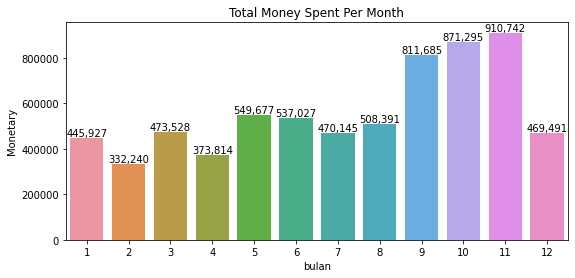

In [243]:
plt.figure(figsize = (9,4))
p = sns.barplot(x='bulan',
            y="Monetary", 
            data=df)
p.bar_label(p.containers[0],labels = [f'{x:,}' for x in df['Monetary']])
plt.title('Total Money Spent Per Month')
plt.show()

In [255]:
df1 = trx_full[trx_full['tahun'] == 2011].groupby('bulan').agg('mean').sort_values(by = 'bulan',ascending = True).reset_index()
df1['bulan'] = df['bulan'].astype('int64')
df1.sort_values(by='bulan', ascending=True)

,bulan,Quantity,Price,Monetary,jam,hari,tahun,tanggal
0,1,18.10,3.08,28.41,12.69,2.87,2011.00,18.57
1,2,12.36,3.15,21.14,12.67,2.54,2011.00,15.06
2,3,12.91,3.30,21.89,12.26,2.29,2011.00,16.91
3,4,12.62,3.61,20.68,12.52,2.47,2011.00,14.04
4,5,12.69,3.66,23.20,12.54,2.86,2011.00,15.56
5,6,13.76,3.12,24.55,12.70,2.61,2011.00,15.31
6,7,13.66,2.78,21.92,12.78,2.76,2011.00,16.92
7,8,14.34,2.94,22.91,12.87,2.51,2011.00,15.30
8,9,13.48,2.96,23.96,12.70,2.87,2011.00,17.05
9,10,11.98,3.39,20.87,12.88,2.55,2011.00,16.17


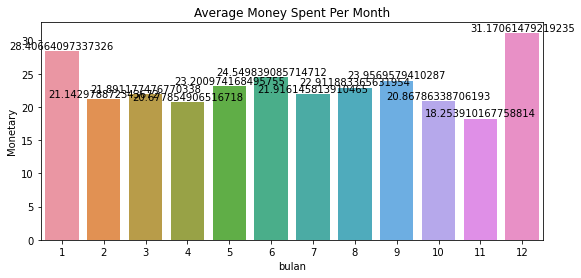

In [256]:
plt.figure(figsize = (9,4))
p = sns.barplot(x='bulan',
            y="Monetary", 
            data=df1)
p.bar_label(p.containers[0],labels = [f'{x:,}' for x in df1 ['Monetary']])
plt.title('Average Money Spent Per Month')
plt.show()

In [69]:
df2 = trx_full.groupby('bulan').agg('count').sort_values(by = 'bulan',ascending = True).reset_index()
df2['bulan'] = df['bulan'].astype('int64')
df2.sort_values(by='bulan', ascending=True)

,bulan,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Monetary,jam,hari,tahun,tanggal
0,1,30153,30153,30153,30153,30153,30153,30153,30153,30153,30153,30153,30153,30153
1,2,32894,32894,32894,32894,32894,32894,32894,32894,32894,32894,32894,32894,32894
2,3,45835,45835,45835,45835,45835,45835,45835,45835,45835,45835,45835,45835,45835
3,4,39010,39010,39010,39010,39010,39010,39010,39010,39010,39010,39010,39010,39010
4,5,46113,46113,46113,46113,46113,46113,46113,46113,46113,46113,46113,46113,46113
5,6,42989,42989,42989,42989,42989,42989,42989,42989,42989,42989,42989,42989,42989
6,7,41951,41951,41951,41951,41951,41951,41951,41951,41951,41951,41951,41951,41951
7,8,42739,42739,42739,42739,42739,42739,42739,42739,42739,42739,42739,42739,42739
8,9,62418,62418,62418,62418,62418,62418,62418,62418,62418,62418,62418,62418,62418
9,10,83468,83468,83468,83468,83468,83468,83468,83468,83468,83468,83468,83468,83468


# LINEAR REGRESSION that Predicts Customer Spending

In [43]:
# Import packages
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [47]:
wrangled_OLS=wrangled_OLS.rename(columns={"days_since_last_purchase":"Recency"})

In [48]:
wrangled_OLS

,2010 Monetary,days_since_first_purchase,Recency,Frequency,avg_order_cost,2011 Monetary
CustomerID,,,,,,
12346,187.31,350.0,185.0,3.0,62.436667,77183.60
12347,2035.11,60.0,23.0,2.0,1017.555000,3440.49
12348,892.80,14.0,14.0,1.0,892.800000,367.00
12349,2440.94,245.0,63.0,2.0,1220.470000,1757.55
12352,200.05,31.0,31.0,1.0,200.050000,1833.54
...,...,...,...,...,...,...
18278,240.30,60.0,60.0,1.0,240.300000,173.90
18280,257.75,50.0,50.0,1.0,257.750000,180.60
18281,120.32,233.0,233.0,1.0,120.320000,80.82


In [49]:
x = wrangled_OLS[['2010 Monetary','Recency','Frequency','avg_order_cost']]
y = wrangled_OLS[['2011 Monetary']]

In [50]:
# Splitting data
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 10)

In [52]:
# Instantiate linear regression model
OLS= LinearRegression()
# Fit the model
model = OLS.fit(x_train, y_train)
# Make predictions
train_pred_y = model.predict(x_train)
test_pred_y = model.predict(x_test)

In [53]:
# Calculate MSE
MSE_train = np.sqrt(mean_squared_error(y_train, train_pred_y))
MSE_test = np.sqrt(mean_squared_error(y_test, test_pred_y))
# Print MSE
print('MSE train: {:.3f}; MSE test: {:.3f}'.format(MSE_train, MSE_test))

MSE train: 2784.363; MSE test: 6514.482


In [55]:
# Calculate R-squared and p-values
y_train = np.array(y_train)
ols_reg = sm.OLS(y_train, x_train)
ols_reg = ols_reg.fit()
# Print OLS regression results
print(ols_reg.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.853
Model:                            OLS   Adj. R-squared (uncentered):              0.853
Method:                 Least Squares   F-statistic:                              2602.
Date:                Wed, 23 Mar 2022   Prob (F-statistic):                        0.00
Time:                        14:12:53   Log-Likelihood:                         -16805.
No. Observations:                1797   AIC:                                  3.362e+04
Df Residuals:                    1793   BIC:                                  3.364e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [82]:
#Predict a Single Customer
single_customer = pd.DataFrame({
    '2010 Monetary': [850],
    'Recency': [20],
    'Frequency': [3],
    'avg_order_cost': [700]
})

In [87]:
print('2011 Monetary=')
OLS.predict(single_customer)

2011 Monetary=


array([[641.43962268]])

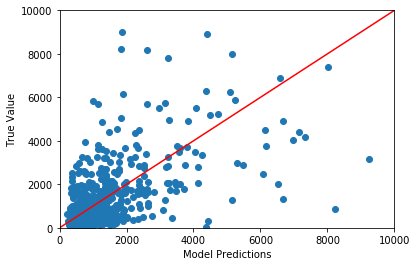

In [88]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(model.predict(x_test),y_test)
plt.xlim(0,10000)
plt.ylim(0,10000)
plt.plot([0, 10000], [0, 10000], 'k-', color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Value')
plt.show()

# FORECAST

In [234]:
#UBAH MENJADI DATA TIME SERIES
trx_full_forecast = trx_full.groupby('InvoiceDate'). agg(Monetary=('Monetary','sum')).reset_index()

In [257]:
trx_full_forecast
trx_full_forecast.set_index('InvoiceDate', inplace=True)

In [258]:
trx_full_forecast.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 28094 entries, 2009-12-01 07:45:00 to 2011-12-09 12:50:00
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Monetary  28094 non-null  float64
dtypes: float64(1)
memory usage: 439.0 KB


In [259]:
trx_full_forecast = trx_full_forecast.resample('D').sum()

In [260]:
trx_full_forecastQ = trx_full_forecast.resample('Q').sum()

In [240]:
trx_full_forecastQ

,Monetary
InvoiceDate,
2009-12-31,468018.91
2010-03-31,1279084.98
2010-06-30,1401698.35
2010-09-30,1589724.95
2010-12-31,2411993.25
2011-03-31,1251696.28
2011-06-30,1460519.47
2011-09-30,1790222.63
2011-12-31,2251530.04


In [233]:
trx_full_forecastQ.to_csv('D:\Side Project Pintap\data_Forecast_qtr1.csv',index = False)

In [196]:
trx_full_forecastQ.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9 entries, 2009-12-31 to 2011-12-31
Freq: Q-DEC
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Monetary  9 non-null      float64
dtypes: float64(1)
memory usage: 144.0 bytes


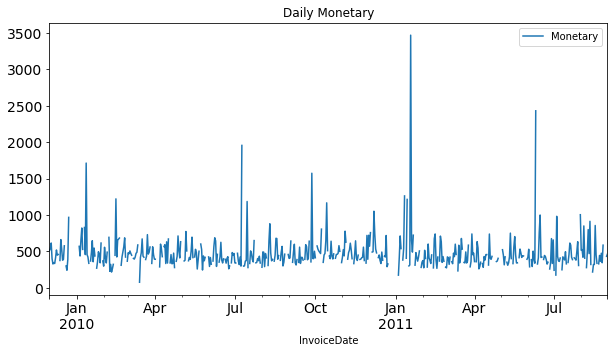

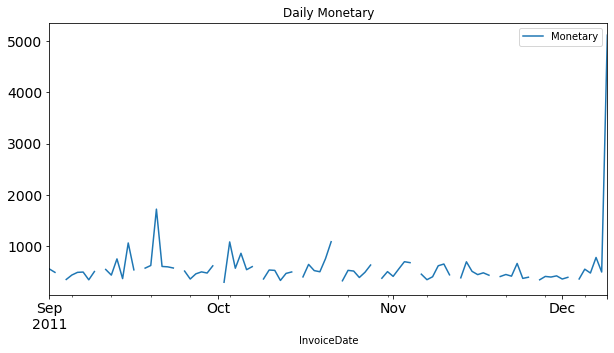

In [109]:
#Plotting data
train.plot(figsize=(10,5), title= 'Daily Monetary', fontsize=14)
test.plot(figsize=(10,5), title= 'Daily Monetary', fontsize=14)
plt.show()

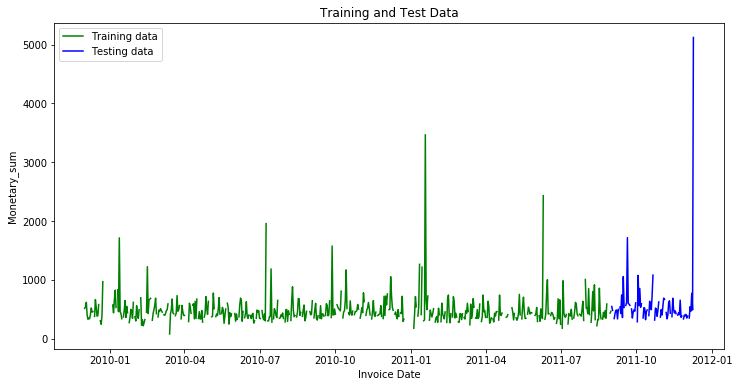

In [113]:
plt.figure(figsize=(12,6))
plt.plot(train, 'g', label='Training data')
plt.plot(test, 'b', label='Testing data')
plt.title('Training and Test Data')
plt.xlabel('Invoice Date')
plt.ylabel('Monetary_sum')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


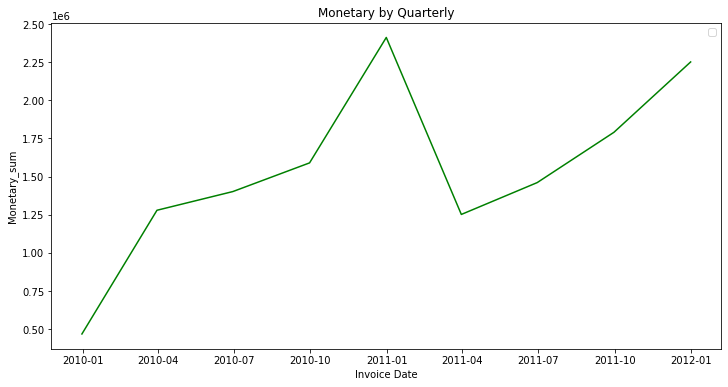

In [113]:
plt.figure(figsize=(12,6))
plt.plot(trx_full_forecastQ, 'g')
plt.title('Monetary by Quarterly')
plt.xlabel('Invoice Date')
plt.ylabel('Monetary_sum')
plt.legend()
plt.show()

# SARIMAX (Seasonal ARIMA)

FORECASTING IN DAILY TIME SECTION

In [85]:
import itertools
import statsmodels.api as sm

pd.set_option('display.float_format', lambda x: '%.2f' % x) # set 2 angka dibelakang koma (desimal)
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [89]:
#Checking Stationarity

from statsmodels.tsa.stattools import adfuller

def test_adf(series, title=''):
    dfout={}
    dftest=sm.tsa.adfuller(series.dropna(), autolag='AIC', regression='ct')
    for key,val in dftest[4].items():
        dfout[f'critical value ({key})']=val
    if dftest[1]<=0.05:
        print("Strong evidence against Null Hypothesis")
        print("Reject Null Hypothesis - Data is Stationary")
        print("Data is Stationary", title)
    else:
        print("Strong evidence for  Null Hypothesis")
        print("Accept Null Hypothesis - Data is not Stationary")
        print("Data is NOT Stationary for", title)

In [92]:
# Parameter Selection
for param in pdq:
     for param_seasonal in seasonal_pdq:
         try:
             mod = sm.tsa.statespace.SARIMAX(trx_full_forecast,
                                             order=param,
                                             seasonal_order=param_seasonal,
                                             enforce_stationarity=False,
                                             enforce_invertibility=False)
             results = mod.fit()
             print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
         except:
             continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:9364.580878711618
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:9025.79602737959
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:8812.885746308526
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:8358.992965420015
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:8773.414282254424
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:8487.750652699657
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:8489.325084340566
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:8358.485201358748
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:9132.455269937866
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:8865.768068967198
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:8800.743863615911
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:8361.678815065272
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:8760.000718286541
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:8475.1362747032
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:8491.237680217513
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:8361.15352942712
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:8906.275180668006
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:8754.653996991266
ARIMA(0, 1, 0)

C:\Users\Rany Dwi C\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:8593.683528447538
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:8445.912489259137
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:8801.456939589123
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:8459.180712969643
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:8446.926575625854
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:8490.835471245886


C:\Users\Rany Dwi C\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:8361.606203408464
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:8769.646668481124
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:8620.00319369218
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:8988.810852710305
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:8545.607866307048
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:8619.710981189244
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:8620.04436056918
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:8663.780345163657
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:8545.375300354495
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:8576.026435807878
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:8428.721878245695
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:8793.552496144486
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:8368.759744703455
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:8441.489242470358
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:8429.593673064262
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:8500.134035054976
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:8368.04420682865


In [93]:
# best model ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:8358.485201358748
mod = sm.tsa.statespace.SARIMAX(trx_full_forecast,
                                order=(0, 0, 0), seasonal_order=(1,1,1,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.0822      0.079     -1.038      0.299      -0.237       0.073
ma.S.L12      -0.9910      0.115     -8.585      0.000      -1.217      -0.765
sigma2      9.362e+04   7842.282     11.938      0.000    7.83e+04    1.09e+05


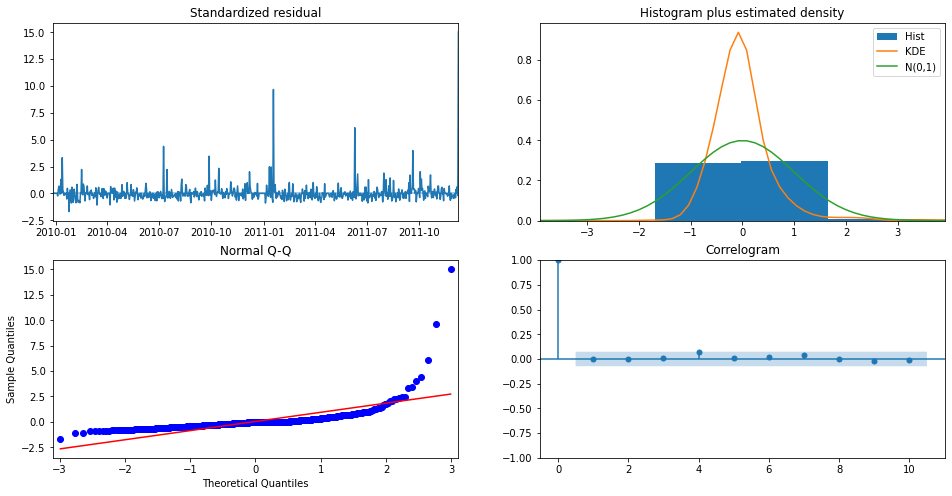

In [94]:
import matplotlib.pyplot as plt
results.plot_diagnostics(figsize=(16, 8))
plt.show()

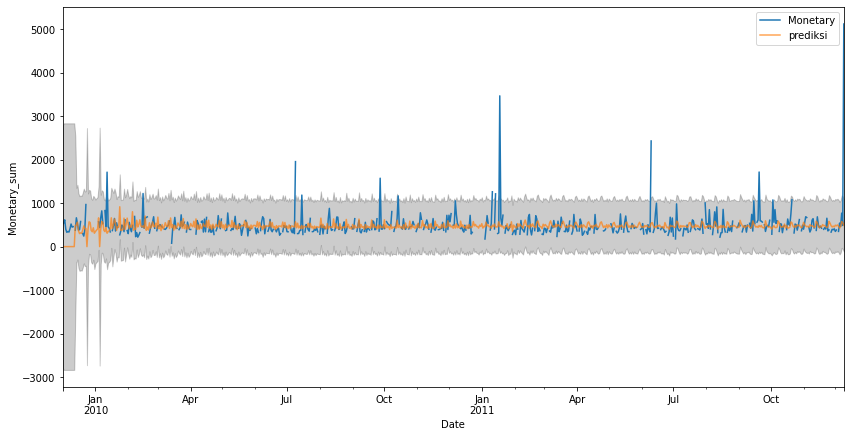

In [95]:
pred = results.get_prediction(start=pd.to_datetime('2009-12-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = trx_full_forecast.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='prediksi', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Monetary_sum')
plt.legend()
plt.show()

In [96]:
y_forecasted = pred.predicted_mean
# print(y_forecasted)
# df_fc['vaksinasi_2']['2021-03-05':]
y_truth = trx_full_forecast['Monetary']['2009-12-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 99871.72
The Root Mean Squared Error of our forecasts is 316.02


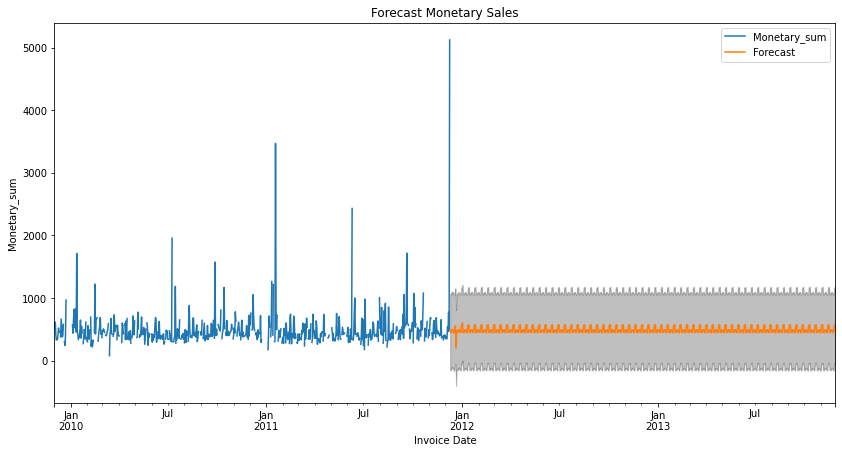

In [97]:
#Forecast 2 year
pred_uc = results.get_forecast(steps=720)
pred_ci = pred_uc.conf_int()
ax = trx_full_forecast['Monetary'].plot(label='Monetary_sum', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_title('Forecast Monetary Sales')
ax.set_xlabel('Invoice Date')
ax.set_ylabel('Monetary_sum')
plt.legend()
plt.show()

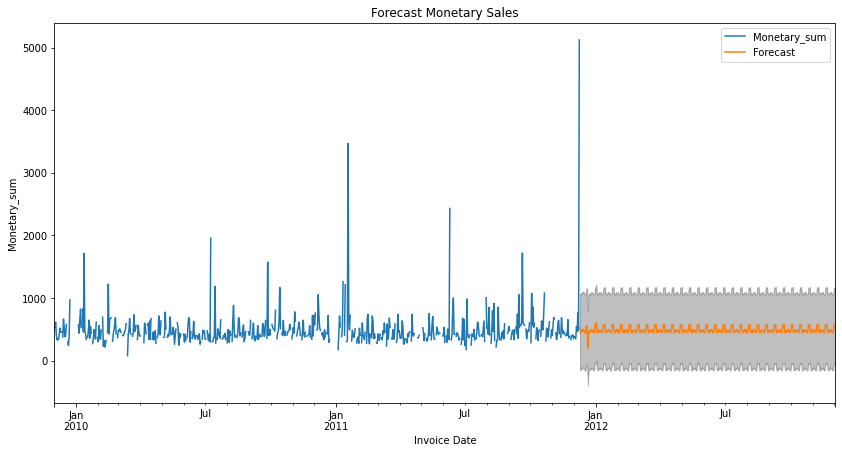

In [98]:
#Forecast 1 year
pred_uc = results.get_forecast(steps=360)
pred_ci = pred_uc.conf_int()
ax = trx_full_forecast['Monetary'].plot(label='Monetary_sum', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_title('Forecast Monetary Sales')
ax.set_xlabel('Invoice Date')
ax.set_ylabel('Monetary_sum')
plt.legend()
plt.show()

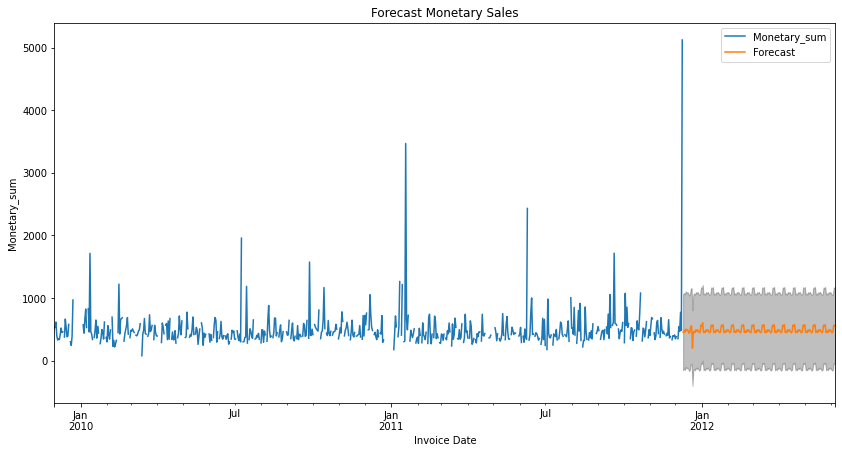

In [99]:
#Forecast 6 months
pred_uc = results.get_forecast(steps=180)
pred_ci = pred_uc.conf_int()
ax = trx_full_forecast['Monetary'].plot(label='Monetary_sum', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_title('Forecast Monetary Sales')
ax.set_xlabel('Invoice Date')
ax.set_ylabel('Monetary_sum')
plt.legend()
plt.show()

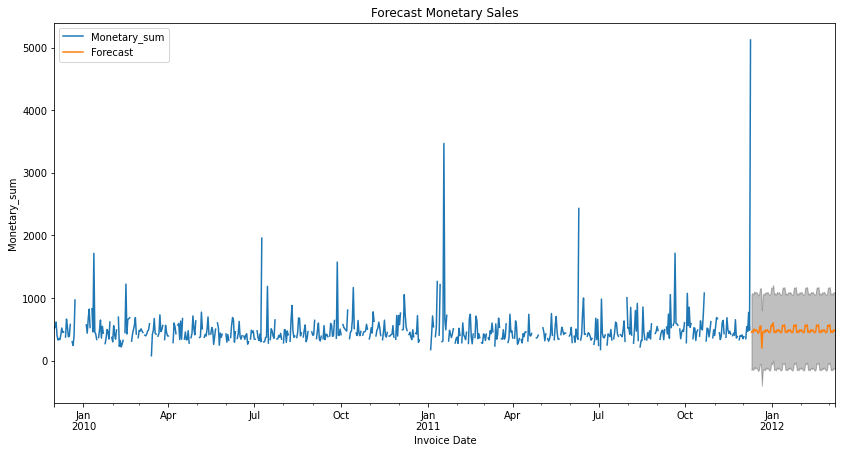

In [100]:
#Forecast 3 months
pred_uc = results.get_forecast(steps=90)
pred_ci = pred_uc.conf_int()
ax = trx_full_forecast['Monetary'].plot(label='Monetary_sum', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_title('Forecast Monetary Sales')
ax.set_xlabel('Invoice Date')
ax.set_ylabel('Monetary_sum')
plt.legend()
plt.show()

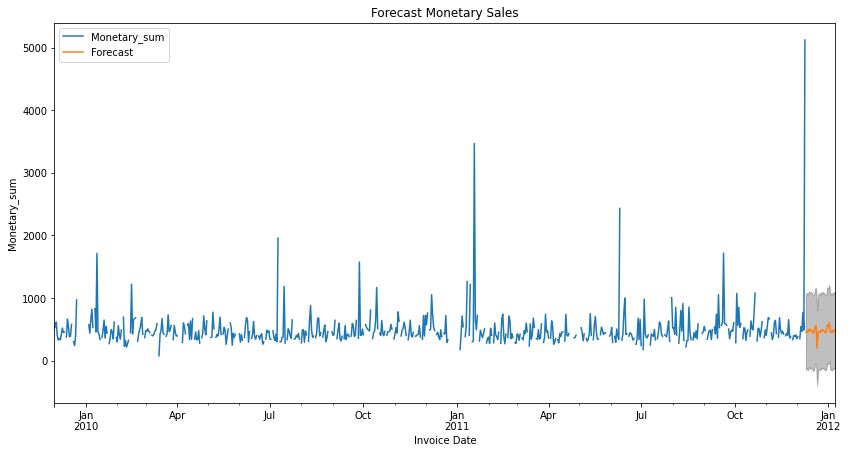

In [101]:
#Forecast 1 month
pred_uc = results.get_forecast(steps=30)
pred_ci = pred_uc.conf_int()
ax = trx_full_forecast['Monetary'].plot(label='Monetary_sum', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_title('Forecast Monetary Sales')
ax.set_xlabel('Invoice Date')
ax.set_ylabel('Monetary_sum')
plt.legend()
plt.show()

FORECAST IN QUARTERLY TIME SECTION

In [114]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [115]:
# Parameter Selection
for param in pdq:
     for param_seasonal in seasonal_pdq:
         try:
             mod = sm.tsa.statespace.SARIMAX(trx_full_forecastQ,
                                             order=param,
                                             seasonal_order=param_seasonal,
                                             enforce_stationarity=False,
                                             enforce_invertibility=False)
             results = mod.fit()
             print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
         except:
             continue
# BEST Model

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:254.56233159434706
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:4.0
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2.0
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:4.0


C:\Users\Rany Dwi C\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)


ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:4.0
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:6.0
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:4.0
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:6.0
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:220.91443165427145
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:6.0
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:4.0
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:6.0
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:6.0
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:8.0

C:\Users\Rany Dwi C\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)



ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:6.0
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:8.0
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:207.89947025121012
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:4.0
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:2.0
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:4.0
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:4.0
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:6.0
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:4.0
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:6.0
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:181.14480016109604
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:6.0
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:4.0
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:6.0
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:6.0
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:8.0
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:6.0
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:8.0
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:240.05090019538423
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:6.0
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:4.0
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:6.0
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:6.0
ARIMA(1, 0,

In [131]:
mod1 = sm.tsa.statespace.SARIMAX(trx_full_forecastQ,
                                order=(0, 1, 1),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results1 = mod1.fit()
print(results1.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3809      0.195     -1.957      0.050      -0.762       0.001
sigma2      2.275e+11   5.42e-15   4.19e+25      0.000    2.27e+11    2.27e+11


In [136]:
mod2 = sm.tsa.statespace.SARIMAX(trx_full_forecastQ,
                                order=(0, 1, 1), seasonal_order=(0,1,1,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results2 = mod2.fit()
print(results2.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1               0         -0        nan        nan           0           0
ma.S.L12            0         -0        nan        nan           0           0
sigma2         1.0000         -0       -inf      0.000       1.000       1.000


C:\Users\Rany Dwi C\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)


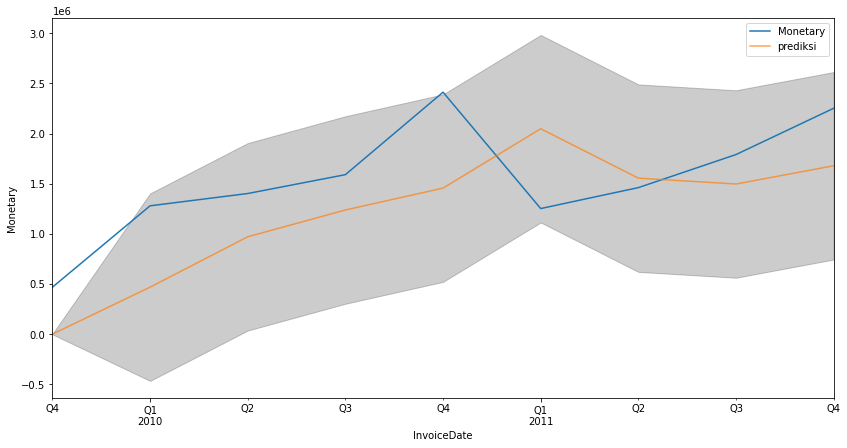

In [154]:
pred = results1.get_prediction(start=pd.to_datetime('2009-12-31'), dynamic=False)
pred_ci = pred.conf_int()
ax = trx_full_forecastQ.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='prediksi', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('InvoiceDate')
ax.set_ylabel('Monetary')
plt.legend()
plt.show()

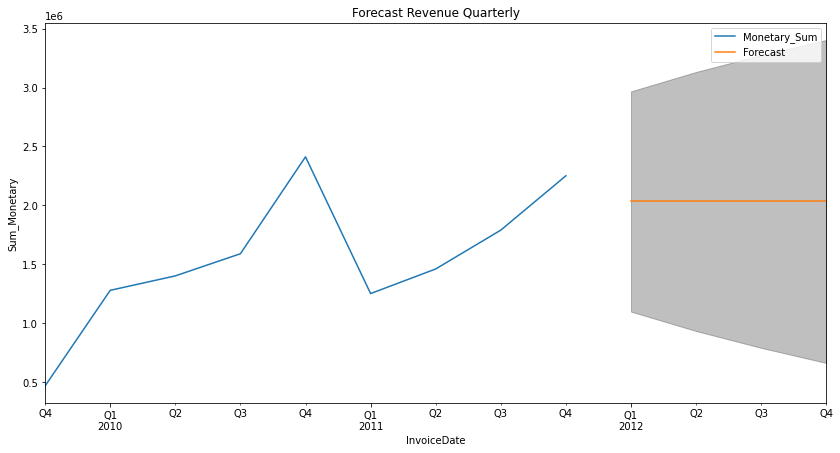

In [218]:
pred_uc = results1.get_forecast(steps=4)
pred_ci = pred_uc.conf_int()
ax = trx_full_forecastQ['Monetary'].plot(label='Monetary_Sum', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_title('Forecast Revenue Quarterly')
ax.set_xlabel('InvoiceDate')
ax.set_ylabel('Sum_Monetary')
plt.legend()
plt.show()

In [219]:
pred_uc.predicted_mean

2012-03-31   2033192.51
2012-06-30   2033192.51
2012-09-30   2033192.51
2012-12-31   2033192.51
Freq: Q-DEC, dtype: float64

CONFIDENCE INTERVAL

In [220]:
pred_ci

,lower Monetary,upper Monetary
2012-03-31,1098363.83,2968021.20
2012-06-30,933715.20,3132669.82
2012-09-30,790696.62,3275688.41
2012-12-31,662520.51,3403864.52


FORECAST AREA

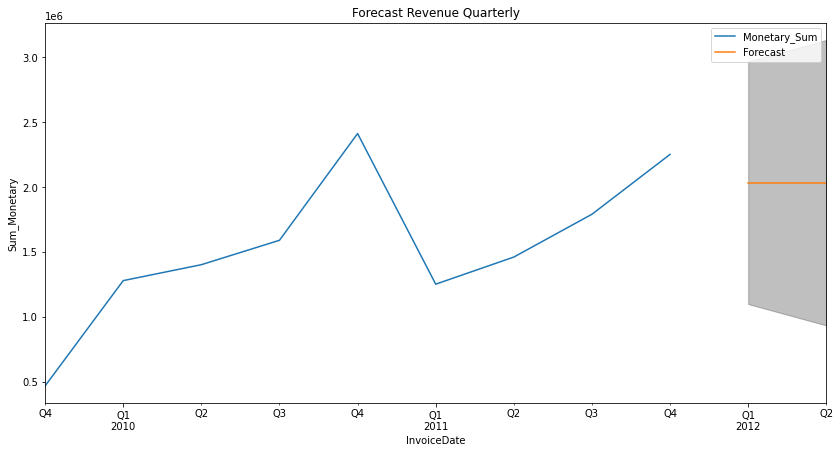

In [221]:
pred_uc = results1.get_forecast(steps=2)
pred_ci = pred_uc.conf_int()
ax = trx_full_forecastQ['Monetary'].plot(label='Monetary_Sum', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_title('Forecast Revenue Quarterly')
ax.set_xlabel('InvoiceDate')
ax.set_ylabel('Sum_Monetary')
plt.legend()
plt.show()

In [222]:
pred_uc.predicted_mean

2012-03-31   2033192.51
2012-06-30   2033192.51
Freq: Q-DEC, dtype: float64

In [223]:
pred_ci

,lower Monetary,upper Monetary
2012-03-31,1098363.83,2968021.20
2012-06-30,933715.20,3132669.82


# Untuk Tableau

In [68]:
#Untuk Tableau
trx_per_cust=trx_full_cust.groupby('CustomerID').agg(Monetary=('Monetary','sum'), Max_trx=('days_since','max'), Min_Trx=('days_since','min'), Frequency=('days_since','nunique')).reset_index()

In [69]:
trx_per_cust

,CustomerID,Monetary,Max_trx,Min_Trx,Frequency
0,12346,77484.41,746,346,6
1,12347,5475.60,425,23,8
2,12348,1259.80,379,269,2
3,12349,4198.49,610,39,3
4,12350,239.20,331,331,1
...,...,...,...,...,...
5480,18283,2349.15,668,24,17
5481,18284,461.68,452,452,1
5482,18285,427.00,681,681,1
5483,18286,1296.43,744,497,2


In [81]:
print(trx_per_cust['Frequency'].quantile(1/3))
print(trx_per_cust['Frequency'].quantile(2/3))

print(trx_per_cust['Monetary'].quantile(1/3))
print(trx_per_cust['Monetary'].quantile(2/3))

print(trx_per_cust['Min_Trx'].quantile(1/3))
print(trx_per_cust['Min_Trx'].quantile(2/3))

2.0
4.0
432.9199999999999
1374.3399999999997
70.0
288.0


In [79]:
trx_per_cust.to_csv('D:\Side Project Pintap\cust_data.csv',index = False)

In [76]:
trx_full.to_csv('full dataset retail', index = False)

In [78]:
trx_full.to_csv('D:\Side Project Pintap\cleansing data.csv', index=False)